# Bombardeos de los Aliados durante la Segunda Guerra Mundial
By Fernando Bielza González

## >Importa librerías necesarias

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import folium

import copy #<--- todo


## >Obtener el DataFrame THOR

In [2]:
df = pd.read_csv('Datasets/thor_wwii.csv')
df

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
0,03/30/1941,ETO,GREAT BRITAIN,RAF,84 SQDN,BLENHEIM,10.0,NaN,NaN,NaN,NaN,ALBANIA,ELBASAN,41.100000,20.070000,0.0,0.0,0.0,0.0
1,11/24/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,DURAZZO,41.320000,19.450000,0.0,0.0,0.0,0.0
2,12/04/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,TEPELENE,40.300000,20.020000,0.0,0.0,0.0,0.0
3,12/31/1940,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
4,01/06/1941,ETO,GREAT BRITAIN,RAF,211 SQDN,BLENHEIM,9.0,NaN,NaN,NaN,NaN,ALBANIA,VALONA,40.470000,19.490000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,08/01/1945,PTO,USA,20 AF,73 BW,B29,99.0,NaN,NaN,NaN,NaN,JAPAN,TOYAMA,36.700000,137.216667,0.0,999.0,0.0,999.0
178277,07/22/1942,MTO,GREAT BRITAIN,RAF,NaN,BLENHEIM,NaN,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178278,08/17/1940,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178279,08/06/1945,PTO,USA,20 AF,509 CG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,HIROSHIMA,34.400000,132.466667,15000.0,0.0,0.0,15000.0


## >Obtener copia de DataFrame original y eliminar fechas sobrantes

In [3]:
#DataFrame general ordenado cronológicamente:
df_total=copy.copy(df)
df_total["MSNDATE"]=pd.to_datetime(df_total["MSNDATE"])
df_total=df_total.sort_values(by='MSNDATE')
df_total_END=df_total[-53:]#<---todo Este DataFrame tiene toda la información posterior a la Final de la Guerra (2 de septiembre de 1945)
df_total=df_total[:-54]#<---todo Este DataFrame tiene toda la información de la Guerra (1 de septiembre de 1939 a 2 de septiembre de 1945)
#(hay 178.228 (-53) operaciones)

df_total

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
3990,1939-09-03,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,10.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""HAMBURG, BREMEN, RUHR""",53.563056,9.967222,0.0,0.0,0.0,0.0
3991,1939-09-04,ETO,GREAT BRITAIN,RAF,139 SQ,BLENHEIM,10.0,WYTON,ENGLAND,52.35694,-0.10777,GERMANY,WILHELMSHAVEN,53.500000,8.050000,0.0,0.0,0.0,0.0
3994,1939-09-04,ETO,GREAT BRITAIN,RAF,9 & 149 SQ,WELLINGTON,9.0,RAF HONINGTON,ENGLAND,52.34277,0.77305,GERMANY,BRUNSBUTTEL,53.895040,9.104836,0.0,0.0,0.0,0.0
4004,1939-09-04,ETO,GREAT BRITAIN,RAF,51 & 58 SQ,WHITLEY,6.0,LECONFIELD,ENGLAND,53.87750,-0.43555,GERMANY,RUHR,52.366667,9.716667,0.0,0.0,0.0,0.0
4014,1939-09-05,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,4.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""MAINZ, DARMSTADT, MANNHEIM, FRANKFURT""",48.766667,9.150000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11864,1945-08-14,PTO,USA,13 AF,42 BG,B25,1.0,NaN,NaN,NaN,NaN,PHILIPPINE ISLANDS,LOO,16.916667,120.916667,0.0,0.0,0.0,0.0
176594,1945-08-14,PTO,USA,20 AF,314 BW,B29,NaN,NaN,NaN,NaN,NaN,JAPAN,ISESAKI,36.300000,139.200000,0.0,247.0,0.0,247.0
56554,1945-08-14,CBI,USA,5 AF,41 FS,P51,10.0,NaN,NaN,NaN,NaN,CHINA,32 10 N 130 0,32.166667,130.033333,3.0,0.0,0.0,3.0
118520,1945-08-14,PTO,USA,20 AF,504 BG,B29,NaN,NaN,NaN,NaN,NaN,JAPAN MINING,NANAO,37.050000,136.966667,0.0,21.0,0.0,21.0


## >Funiones para Limpiar DataFrames

In [59]:

#Función para ver únicamente las operaciones británicas:
def df_total_england (df_total_year):
    df_total_england=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]
    return df_total_england



#Función para ver únicamente las operaciones norteamericanas:
def df_total_usa (df_total_year):
    df_total_usa=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]=="USA"]
    return df_total_usa



#Función para ver únicamente las operaciones de Nueva Zelanda, Australia y Sudáfrica:
def df_total_aliades (df_total_year):
    df_total_aliades=df_total_year[df_total_year["COUNTRY_FLYING_MISSION"]!="USA"]
    df_total_aliades=df_total_aliades[df_total_aliades["COUNTRY_FLYING_MISSION"]!="GREAT BRITAIN"]
    return df_total_aliades



#Función para geolocalizar [muestra Fecha, País Atacante, Localidad Atacada, Latitud, Longitud y Daño Total]:   <---(hay 169.490 (-8.791) operaciones)
def df_gps(df_total_year):
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME'], axis=1)
    df_gps=df_gps.dropna()
    r = folium.Map(location=[20, 20], zoom_start=3)
    for (index, row) in df_gps.iterrows():
        folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']],
                 popup = row.loc['TGT_LOCATION'],
                 tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="red", icon="tree-deciduous"),).add_to(r)
        #Para los iconos, tenemos varias opciones: 1º Bomba ["tree-deciduous"], 2º Fuego ["fire"] y 3º Mirilla [screenshot],
        # 4º Equis ["remove-circle"], 5º Gota de Sangre ["tint"], 6º AVION ["plane"], 7º Estrella ["star"], 8º Corona ["king"], 9º Libra ["gbp"], 10º Cerdito ["piggy-bank"], 
        # 11º Rayo ["flash"], 12º Hoja ["leaf"], 13º Sol ["certificate"], 14º Círculo ["record"], 15º A ["font"]
    return r


#Función para para cronología [muestra solo Fecha]:
def df_crono (df_total_year):
    df_crono=df_total_year.drop(['COUNTRY_FLYING_MISSION', 'TGT_COUNTRY', 'TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME', 'TGT_LATITUDE', 'TGT_LONGITUDE', 'TOTAL_TONS'], axis=1)
    return df_crono



#Función para Modelos de Avión [muestra Fecha, Modelo de Avión y Daño Total]:   <---(hay 178.088  (-139) operaciones)
def df_aviones(df_total_year):
    df_aviones=df_total_year.drop(['TGT_COUNTRY', 'TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'COUNTRY_FLYING_MISSION',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'TGT_LATITUDE', 'TGT_LONGITUDE'], axis=1)
    return df_aviones.dropna()





In [5]:
df_total["COUNTRY_FLYING_MISSION"].value_counts()
#Para USA [icon="star"]
#Para Great Britain [icon="king"] o [icon="gbp"]
#Para New Zealand [icon="leaf"]
#Para Australia [icon="font"]
#Para South Africa [icon="certificate"]

"""
'red',                  <---Sí                                                   -Para media inteisada
    'blue',             <---Sí                                                   -Para baja intensidad
    'gray',             <---Sí                                                   -Para alta intensiad
    'darkred',          <---Sí                                                   -Para alta insidad
    'lightred',         <---Demasiado claro
    'orange',           <---Sí                                                   -Para media intensidad, próximo al rojo
    'beige',            <---Demasiado claro, parecido al lightgray
    'green',            <---Sí                                                   -Para baja intensidad
    'darkgreen',        <---Parece casi marrón                                   -Para media intensidad
    'lightgreen',       >---Gay
    'darkblue',         <---Sí                                                   -Próximo al darkpurple
    'lightblue',        >---Gay, muy parecido al lightgray
    'purple',           <---Sí, muy parecido al Pink                             -Baja intensidad
    'darkpurple',       <---Sí                                                   -Muy próximo al Negro
    'pink',             >---Gay, quizás sea un poco insulto utilizarlo
    'cadetblue',        <---Un gris oscuro, entre el negro y el azul             -Próximo al darkpuple
    'lightgray',        <---Tal vez. Color suave, para baja intensidad           -1-5
    'black'             <---Sí                                                   -over 1.000
"""
"""
-rojo                                     - red
-azul                                     - blue
-gris                                     - gray
-rojo oscuro                              - darkred
-rojo claro                               - lightred
-naranja                                  - orange
-color carne                              - beige
-verde                                    - green
-verde oscuro (marrón)                    - darkgreen
-verde claro                              - lightgreen
-azul oscuro                              - darkblue
-azul claro                               - lightblue
-púrpura                                  - purple
-púrpura oscuro                           - darkpurple
-rosa                                     - pink
-gris oscuro                              - cadetblue
-gris claro                               - lightgray
-negro                                    - black
"""

'\n-rojo                                     - red\n-azul                                     - blue\n-gris                                     - gray\n-rojo oscuro                              - darkred\n-rojo claro                               - lightred\n-naranja                                  - orange\n-color carne                              - beige\n-verde                                    - green\n-verde oscuro (marrón)                    - darkgreen\n-verde claro                              - lightgreen\n-azul oscuro                              - darkblue\n-azul claro                               - lightblue\n-púrpura                                  - purple\n-púrpura oscuro                           - darkpurple\n-rosa                                     - pink\n-gris oscuro                              - cadetblue\n-gris claro                               - lightgray\n-negro                                    - black\n'

In [6]:
"""
-blanco                                   - white                                          - 0
-verde claro                              - lightgreen                                     - 1-2
-color carne                              - beige                                          - 3-4
-rojo claro                               - lightred                                       - 5-6
-azul claro                               - lightblue                                      - 7-8
-gris claro                               - lightgray                                      - 9-10

-verde                                    - green                                          - 11-20
-verde oscuro (marrón)                    - darkgreen                                      - 21-30
-rojo oscuro                              - darkred                                        - 31-40
-rojo                                     - red                                            - 41-50
-naranja                                  - orange                                         - 51-60
-púrpura                                  - purple                                         - 60-109
-azul                                     - blue                                           - 
-púrpura oscuro                           - darkpurple                                     - 200-399
-azul oscuro                              - darkblue                                       - 400-599
-gris oscuro                              - cadetblue                                      - 600-799
-gris                                     - gray                                           - 800-999
-negro                                    - black                                          - 1.000
"""

'\n-blanco                                   - white                                          - 0\n-verde claro                              - lightgreen                                     - 1-2\n-color carne                              - beige                                          - 3-4\n-rojo claro                               - lightred                                       - 5-6\n-azul claro                               - lightblue                                      - 7-8\n-gris claro                               - lightgray                                      - 9-10\n\n-verde                                    - green                                          - 11-20\n-verde oscuro (marrón)                    - darkgreen                                      - 21-30\n-rojo oscuro                              - darkred                                        - 31-40\n-rojo                                     - red                                            - 41-50\n-naranja

In [7]:
from branca.element import Figure
map_cm_fa = folium.Map(location=[38,-98], zoom_start=6)
folium.Marker(location=[38,-98],
            popup='popup',
            icon=folium.Icon(color='black', icon='fire')).add_to(map_cm_fa)
fig = Figure(width=500, height=300)
fig.add_child(map_cm_fa)
fig

In [8]:
def df_gps_2(df_total_year):
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME'], axis=1)
    df_gps=df_gps.dropna()
    r = folium.Map(location=[20, 20], zoom_start=2)
    for (index, row) in df_gps.iterrows():
        if row.loc['COUNTRY_FLYING_MISSION'] == "USA":
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="blue", icon="star"),).add_to(r)
        elif row.loc['COUNTRY_FLYING_MISSION'] == "GREAT BRITAIN":
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="red", icon="gbp"),).add_to(r)
        elif row.loc['COUNTRY_FLYING_MISSION'] == "NEW ZEALAND":
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="green", icon="leaf"),).add_to(r)
        elif row.loc['COUNTRY_FLYING_MISSION'] == "AUSTRALIA":
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="pink", icon="font"),).add_to(r)
        else:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="black", icon="certificate"),).add_to(r)
        #Para los iconos, tenemos varias opciones: 1º Bomba ["tree-deciduous"], 2º Fuego ["fire"] y 3º Mirilla [screenshot],
        # 4º Equis ["remove-circle"], 5º Gota de Sangre ["tint"], 6º AVION ["plane"], 7º Estrella ["star"], 8º Corona ["king"], 9º Libra ["gbp"], 10º Cerdito ["piggy-bank"], 
        # 11º Rayo ["flash"], 12º Hoja ["leaf"], 13º Sol ["certificate"], 14º Círculo ["record"], 15º A ["font"]
    return r

In [9]:
def df_gps_3(df_total_year):
    df_gps=df_total_year.drop(['TGT_COUNTRY', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'AIRCRAFT_NAME'], axis=1)
    df_gps=df_gps.dropna()
    r = folium.Map(location=[50, 20], zoom_start=5)
    for (index, row) in df_gps.iterrows():
        if row.loc['TOTAL_TONS']>1000:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="black", icon="tree-deciduous"),).add_to(r)
        elif row.loc['TOTAL_TONS']>900:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="red", icon="tree-deciduous"),).add_to(r)
        elif row.loc['TOTAL_TONS']>600:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="orange", icon="tree-deciduous"),).add_to(r)
        elif row.loc['TOTAL_TONS']>200:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="pink", icon="tree-deciduous"),).add_to(r)
        elif row.loc['TOTAL_TONS']>90:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="yellow", icon="tree-deciduous"),).add_to(r)
        elif row.loc['TOTAL_TONS']>29:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="green", icon="tree-deciduous"),).add_to(r)
        elif row.loc['TOTAL_TONS']>5:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="blue", icon="tree-deciduous"),).add_to(r)
        else:
            folium.Marker(location = [row.loc['TGT_LATITUDE'], row.loc['TGT_LONGITUDE']], popup = row.loc['TGT_LOCATION'], tooltip = row.loc['TGT_LOCATION'], icon=folium.Icon(color="white", icon="tree-deciduous"),).add_to(r)
    return r

## >Generar DataFrames por Año

In [10]:
#Obtener el número de operaciones por Año:
lista_op=[len(df[df.MSNDATE.str.contains("1939")]),
          len(df[df.MSNDATE.str.contains("1940")]),
          len(df[df.MSNDATE.str.contains("1941")]),
          len(df[df.MSNDATE.str.contains("1942")]),
          len(df[df.MSNDATE.str.contains("1943")]),
          len(df[df.MSNDATE.str.contains("1944")])]

#Generar DataFrames por Año:
#Año 1939
df_total_39=df_total[:lista_op[0]]                                                                #<---todo Hay un total de 41 operaciones

#Año 1940
df_total_40=df_total[lista_op[0]:
                     (lista_op[0]+lista_op[1])]                                                   #<---todo Hay un total de 6.742 operaciones

#Año 1941
df_total_41=df_total[(lista_op[0]+lista_op[1]):
                     (lista_op[0]+lista_op[1]+lista_op[2])]                                       #<---todo Hay un total de 10.275 operaciones

#Año 1942
df_total_42=df_total[(lista_op[0]+lista_op[1]+lista_op[2]):
                     (lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3])]                           #<---todo Hay un total de 6.051 operaciones

#Año 1943
df_total_43=df_total[(lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]):
                     (lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4])]               #<---todo Hay un total de 23.214 operaciones

#Año 1944
df_total_44=df_total[(lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4]):
                     (lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4]+lista_op[5])]   #<---todo Hay un total de 80.550 operaciones

#Año 1945
df_total_45=df_total[(lista_op[0]+lista_op[1]+lista_op[2]+lista_op[3]+lista_op[4]+lista_op[5]):]  #<---todo Hay un total de 51.354 operaciones

#Año 1945 (después de la Guerra)
df_total_END;                                                                                     #<---todo Hay un total de 53 operaciones

### Operaciones en toda la Guerra

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

<Figure size 1440x1440 with 0 Axes>

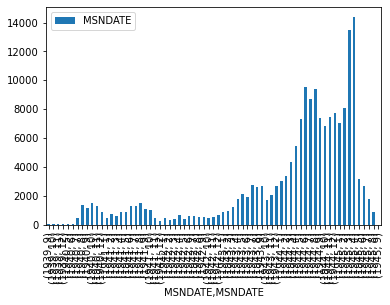

In [11]:
plt.figure(figsize=(20,20))#<---¿POR QUE NO FUNCIONA?

df_crono_total=df_crono(df_total)

df_crono_total.groupby([df_crono_total["MSNDATE"].dt.year, df_crono_total["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones en 1939

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

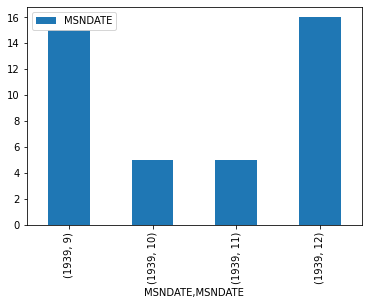

In [12]:
df_crono_39=df_crono(df_total_39)

df_crono_39.groupby([df_crono_39["MSNDATE"].dt.year, df_crono_39["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones en 1940

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

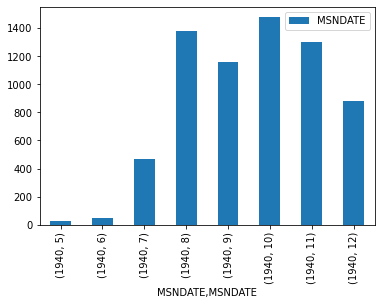

In [13]:
df_crono_40=df_crono(df_total_40)

df_crono_40.groupby([df_crono_40["MSNDATE"].dt.year, df_crono_40["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones en 1941

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

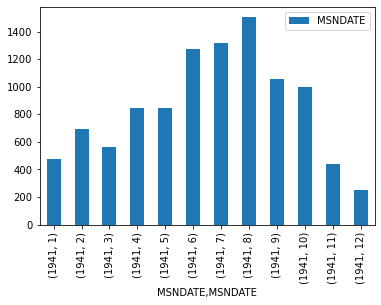

In [14]:
df_crono_41=df_crono(df_total_41)

df_crono_41.groupby([df_crono_41["MSNDATE"].dt.year, df_crono_41["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones en 1942

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

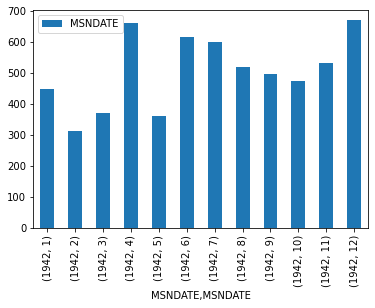

In [15]:
df_crono_42=df_crono(df_total_42)

df_crono_42.groupby([df_crono_42["MSNDATE"].dt.year, df_crono_42["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones en 1943

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

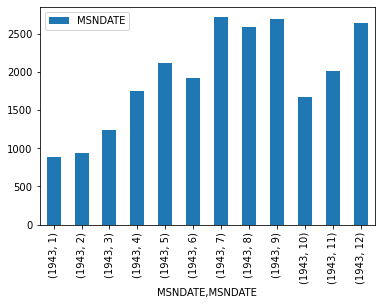

In [16]:
df_crono_43=df_crono(df_total_43)

df_crono_43.groupby([df_crono_43["MSNDATE"].dt.year, df_crono_43["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones en 1944

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

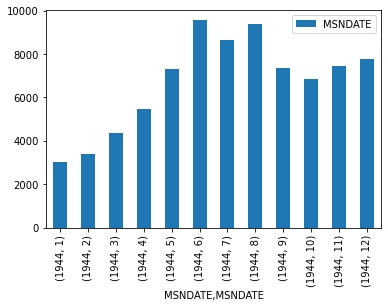

In [17]:
df_crono_44=df_crono(df_total_44)

df_crono_44.groupby([df_crono_44["MSNDATE"].dt.year, df_crono_44["MSNDATE"].dt.month]).count().plot(kind="bar")

#### Operaciones 1945

<AxesSubplot:xlabel='MSNDATE,MSNDATE'>

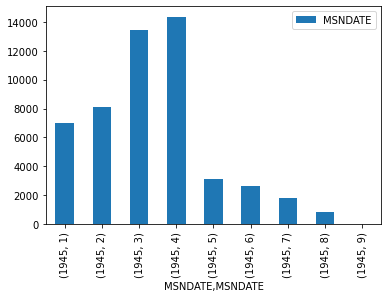

In [18]:
df_crono_45=df_crono(df_total_45)

df_crono_45.groupby([df_crono_45["MSNDATE"].dt.year, df_crono_45["MSNDATE"].dt.month]).count().plot(kind="bar")

### Número de combinaciones entre Reino Unido y los Países Atacados

<AxesSubplot:xlabel='TGT_COUNTRY,COUNTRY_FLYING_MISSION'>

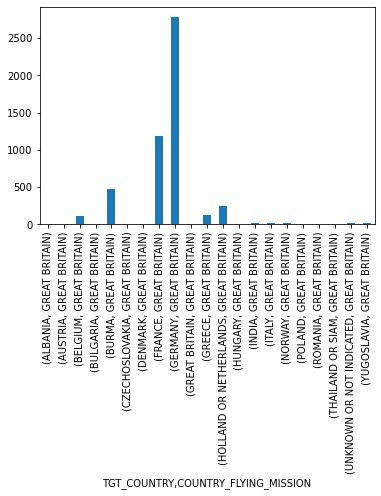

In [19]:
x=df_total_44[df_total_44["COUNTRY_FLYING_MISSION"]=="GREAT BRITAIN"]

groups = x.groupby(['TGT_COUNTRY','COUNTRY_FLYING_MISSION']).size()
groups.plot.bar()

## >Fechas Destacadas

### Generar DataFrame con índice en la Fecha

In [20]:
df_total_dias=df_total.set_index('MSNDATE',inplace=False)#<--- todo ¡RECUERDA! para sustituir defitivamente, poner "inplace=True"
df_total_dias

,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
MSNDATE,,,,,,,,,,,,,,,,,,
1939-09-03,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,10.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""HAMBURG, BREMEN, RUHR""",53.563056,9.967222,0.0,0.0,0.0,0.0
1939-09-04,ETO,GREAT BRITAIN,RAF,139 SQ,BLENHEIM,10.0,WYTON,ENGLAND,52.35694,-0.10777,GERMANY,WILHELMSHAVEN,53.500000,8.050000,0.0,0.0,0.0,0.0
1939-09-04,ETO,GREAT BRITAIN,RAF,9 & 149 SQ,WELLINGTON,9.0,RAF HONINGTON,ENGLAND,52.34277,0.77305,GERMANY,BRUNSBUTTEL,53.895040,9.104836,0.0,0.0,0.0,0.0
1939-09-04,ETO,GREAT BRITAIN,RAF,51 & 58 SQ,WHITLEY,6.0,LECONFIELD,ENGLAND,53.87750,-0.43555,GERMANY,RUHR,52.366667,9.716667,0.0,0.0,0.0,0.0
1939-09-05,ETO,GREAT BRITAIN,RAF,51 SQDN,WHITLEY,4.0,LINTON-ON-OUSE,ENGLAND,54.04916,-1.25333,GERMANY,"""MAINZ, DARMSTADT, MANNHEIM, FRANKFURT""",48.766667,9.150000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945-08-14,PTO,USA,13 AF,42 BG,B25,1.0,NaN,NaN,NaN,NaN,PHILIPPINE ISLANDS,LOO,16.916667,120.916667,0.0,0.0,0.0,0.0
1945-08-14,PTO,USA,20 AF,314 BW,B29,NaN,NaN,NaN,NaN,NaN,JAPAN,ISESAKI,36.300000,139.200000,0.0,247.0,0.0,247.0
1945-08-14,CBI,USA,5 AF,41 FS,P51,10.0,NaN,NaN,NaN,NaN,CHINA,32 10 N 130 0,32.166667,130.033333,3.0,0.0,0.0,3.0


### Fechas Destacadas

#### Batalla de Francia (del 10 de mayo al 25 de junio de 1940)

In [79]:
df_total_Francia=df_total_40[:69]#<---15 de mayo a 25 de junio
df_total_Francia=df_total_england(df_total_Francia)
df_total_Francia

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
21318,1940-05-15,ETO,GREAT BRITAIN,RAF,NaN,WHITLEY,1.0,NaN,NaN,NaN,NaN,GERMANY,NaN,NaN,NaN,1.0,0.0,0.0,1.0
20494,1940-05-15,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,2.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
58606,1940-05-15,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,4.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,45.95,7.97,3.0,0.0,0.0,3.0
25375,1940-05-15,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,NaN,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,45.95,7.97,1.0,0.0,0.0,1.0
4094,1940-05-15,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1940-06-25,ETO,GREAT BRITAIN,RAF,NaN,WHITLEY,NaN,NaN,NaN,NaN,NaN,BELGIUM,ARAD,46.18,21.32,0.0,0.0,0.0,0.0
21328,1940-06-25,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,NaN,NaN,NaN,1.0,0.0,0.0,1.0
28359,1940-06-25,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,NaN,NaN,NaN,1.0,0.0,0.0,1.0
28360,1940-06-25,ETO,GREAT BRITAIN,RAF,NaN,WHITLEY,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,ARAD,46.18,21.32,1.0,0.0,0.0,1.0


#### Batalla de Inglaterra (del 10 de julio al 31 de octubre de 1940)

In [69]:
df_total_Inglaterra=df_total_40[91:4550]#<---10 de julio a 31 de octubre
df_total_Inglaterra=df_total_england(df_total_Inglaterra)

df_total_Inglaterra

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
28364,1940-07-11,ETO,GREAT BRITAIN,RAF,NaN,WELLINGTON,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,ARAD,46.18,21.32,1.0,0.0,0.0,1.0
48335,1940-07-11,ETO,GREAT BRITAIN,RAF,NaN,WELLINGTON,1.0,NaN,NaN,NaN,NaN,HOLLAND OR NETHERLANDS,NaN,NaN,NaN,2.0,0.0,0.0,2.0
21333,1940-07-13,ETO,GREAT BRITAIN,RAF,NaN,WELLINGTON,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,47.33,14.50,1.0,0.0,0.0,1.0
21334,1940-07-14,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,1.0,NaN,NaN,NaN,NaN,GERMANY,UNKNOWN,NaN,NaN,1.0,0.0,0.0,1.0
11094,1940-07-15,MTO,GREAT BRITAIN,RAF,55/211,BLENHEIM,NaN,NaN,NaN,NaN,NaN,LIBYA,GAZALA,32.15,23.36,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26028,1940-10-30,ETO,GREAT BRITAIN,RAF,NaN,WHITLEY,NaN,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,1.0,0.0,0.0,1.0
62555,1940-10-30,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,NaN,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,3.0,0.0,0.0,3.0
44456,1940-10-30,ETO,GREAT BRITAIN,RAF,NaN,HAMPDEN,2.0,NaN,NaN,NaN,NaN,GERMANY,HANNOVER,52.38,9.73,2.0,0.0,0.0,2.0
4286,1940-10-30,ETO,GREAT BRITAIN,RAF,NaN,WHITLEY,1.0,NaN,NaN,NaN,NaN,GERMANY,BERLIN,52.53,13.42,0.0,0.0,0.0,0.0


#### Bombardeo de Colonia (del 30 al 31 de Mayo de 1942)

In [21]:
df_total_Colonia=df_total_42[2096:2149]#<---30-31 de Mayo
df_total_Colonia=df_total_Colonia[df_total_Colonia["TGT_LOCATION"]=="COLOGNE"]

df_total_Colonia

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
96459,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,10.0,0.0,0.0,10.0
46607,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,0.0,2.0,0.0,2.0
116806,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,20.0,0.0,0.0,20.0
147882,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,12.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,38.0,0.0,0.0,38.0
101490,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,0.0,12.0,0.0,12.0
177529,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,0.0,470.0,0.0,470.0
175950,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,162.0,0.0,0.0,162.0
115536,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,5.0,14.0,0.0,19.0
150730,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,41.0,0.0,0.0,41.0
96006,1942-05-30,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,10.0,NaN,NaN,NaN,NaN,GERMANY,COLOGNE,50.93,6.95,2.0,8.0,0.0,10.0


#### Bombardeos de Hamburgo (del 24 de julio al 3 de agosto de 1943)

In [75]:
df_total_Hamburgo=df_total_43[10908:11846]#<---del 24 de julio al 3 de agosto
df_total_Hamburgo=df_total_Hamburgo[df_total_Hamburgo["TGT_LOCATION"]=="HAMBURG"]
df_total_Hamburgo

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
177670,1943-07-24,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,519.0
154819,1943-07-24,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,68.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,18.0,29.0,0.0,47.0
6920,1943-07-24,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,0.0
177665,1943-07-24,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,394.0,643.0,0.0,518.0
177170,1943-07-24,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,272.0,98.0,0.0,370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129115,1943-08-02,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,44.0,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,6.0,22.0,0.0,28.0
6932,1943-08-02,ETO,GREAT BRITAIN,RAF,NaN,MEDIUM,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,0.0,0.0,0.0,0.0
162900,1943-08-02,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,60.0,0.0,0.0,60.0
176764,1943-08-02,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,HAMBURG,53.55,10.0,276.0,0.0,0.0,276.0


#### Bombardeos de Wuhan (del 18 al 21 de diciembre de 1944)

In [23]:
df_total_Wuhan=df_total_44[-3888:-3237]#<---18-19 y 21 de diciembre de 1944

#Por algún motivo, la localización de Wuhan no está referida como "WUHAN", sino como "HANKOW", "HANKON", "HAINAN ISLAND" y "WUCHUANG". Esto se puede comprobar por las coordenadas.
A=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKOW"]
B=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HANKON"]
C=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="HAINAN ISLAND"]
D=df_total_Wuhan[df_total_Wuhan["TGT_LOCATION"]=="WUCHUANG"]
df_total_Wuhan = A.append([B,C,D])

df_total_Wuhan=df_total_Wuhan.sort_values(by='MSNDATE')

df_total_Wuhan

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
111024,1944-12-18,CBI,USA,14 AF,374 BS,B24,6.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.600000,114.333333,0.0,0.0,17.0,17.0
111023,1944-12-18,CBI,USA,14 AF,373 BS,B24,8.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.600000,114.333333,0.0,0.0,17.0,17.0
56826,1944-12-18,CBI,USA,14 AF,491 BS,B25,10.0,NaN,NaN,NaN,NaN,CHINA,HAINAN ISLAND,30.600000,114.333333,0.0,0.0,2.0,3.0
98325,1944-12-18,CBI,USA,14 AF,11 BS,B25,12.0,NaN,NaN,NaN,NaN,CHINA,WUCHUANG,30.533333,114.283333,0.0,0.0,11.0,11.0
41011,1944-12-19,CBI,USA,20 AF,40 BG,B29,1.0,NaN,NaN,NaN,NaN,CHINA,HANKOW,30.550000,114.283333,1.0,1.0,0.0,2.0
56537,1944-12-19,CBI,USA,20 AF,444 BG,B29,1.0,NaN,NaN,NaN,NaN,CHINA,HANKOW,30.550000,114.283333,2.0,1.0,0.0,3.0
41423,1944-12-21,CBI,USA,14 AF,75 FS,P51,1.0,NaN,NaN,NaN,NaN,CHINA,HANKON,30.600000,114.333333,2.0,0.0,0.0,2.0


#### Bombardeos de Dresde (del 13 al 15 de febrero de 1945)

In [24]:
df_total_Dresden=df_total_45[df_total_45["TGT_LOCATION"]=="DRESDEN"]
df_total_Dresden=df_total_Dresden[19:85]

df_total_Dresden

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
24568,1945-02-13,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,1.0,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,1.0,0.0,0.0,1.0
175911,1945-02-13,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,158.0,0.0,0.0,158.0
111525,1945-02-13,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,17.0,0.0,0.0,17.0
164812,1945-02-13,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,64.0,0.0,0.0,64.0
63020,1945-02-13,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,3.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124662,1945-02-15,ETO,USA,8 AF,NaN,B17,11.0,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,25.0,0.0,0.0,25.0
124661,1945-02-15,ETO,USA,8 AF,NaN,B17,11.0,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,25.0,0.0,0.0,25.0
116502,1945-02-15,ETO,USA,8 AF,NaN,B17,9.0,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,20.0,0.0,0.0,20.0
122554,1945-02-15,ETO,USA,8 AF,NaN,B17,11.0,NaN,NaN,NaN,NaN,GERMANY,DRESDEN,51.05,13.75,24.0,0.0,0.0,24.0


#### Bombardeos de Tokio (el 9 de marzo de 1945)

In [25]:
df_total_Tokyo=df_total_45[df_total_45["TGT_LOCATION"]=="TOKYO"]
df_total_Tokyo=df_total_Tokyo[79:97]
df_total_Tokyo

,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
121448,1945-03-09,PTO,USA,20 AF,9 BG,B29,NaN,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,23.0,0.0,23.0
173332,1945-03-09,PTO,USA,20 AF,504 BG,B29,15.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,95.0,0.0,95.0
102712,1945-03-09,PTO,USA,20 AF,505 BG,B29,1.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,12.0,0.0,12.0
132196,1945-03-09,PTO,USA,20 AF,29 BG,B29,NaN,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,29.0,0.0,29.0
175239,1945-03-09,PTO,USA,20 AF,19 BG,B29,25.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,117.0,0.0,117.0
175401,1945-03-09,PTO,USA,20 AF,9 BG,B29,26.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,123.0,0.0,123.0
176252,1945-03-09,PTO,USA,20 AF,6 BG,B29,32.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,195.0,0.0,195.0
170569,1945-03-09,PTO,USA,20 AF,29 BG,B29,24.0,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,80.0,0.0,80.0
10772,1945-03-09,PTO,USA,20 AF,19 BG,B29,NaN,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,0.0,0.0,0.0
176313,1945-03-09,PTO,USA,20 AF,497 BG,B29,NaN,NaN,NaN,NaN,NaN,JAPAN,TOKYO,35.666667,139.7,0.0,202.0,0.0,202.0


#### Bombardeos de Hiroshima y Nagasaki (el 6 y el 9 de agosto de 1945)

In [26]:
df_total_Hiroshima=df_total.iloc[-569]
df_total_Nagasaki=df_total.iloc[-322]

print ("Bombardeo de Hiroshima:\n", df_total_Hiroshima.dropna(), "\n")
print ("Bombardeo de Nagasaki:\n", df_total_Nagasaki.dropna(), "\n")

Bombardeo de Hiroshima:
 MSNDATE                   1945-08-06 00:00:00
THEATER                                   PTO
COUNTRY_FLYING_MISSION                    USA
NAF                                     20 AF
UNIT_ID                                509 CG
AIRCRAFT_NAME                             B29
AC_ATTACKING                              1.0
TGT_COUNTRY                             JAPAN
TGT_LOCATION                        HIROSHIMA
TGT_LATITUDE                             34.4
TGT_LONGITUDE                      132.466667
TONS_HE                               15000.0
TONS_IC                                   0.0
TONS_FRAG                                 0.0
TOTAL_TONS                            15000.0
Name: 178279, dtype: object 

Bombardeo de Nagasaki:
 MSNDATE                   1945-08-09 00:00:00
THEATER                                   PTO
COUNTRY_FLYING_MISSION                    USA
NAF                                     20 AF
UNIT_ID                                509 CG
A

## >Teatro de Operaciones más frecuente

### Teatro de Operaciones más frecuentes, en Total

C:\Users\ferbi\AppData\Local\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='THEATER', ylabel='count'>

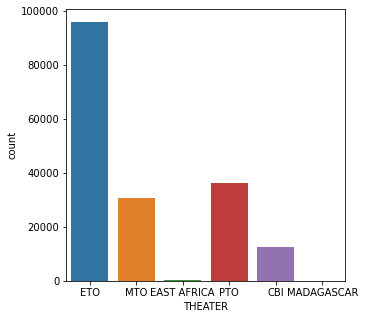

In [27]:
plt.figure(figsize=(5,5))
sns.countplot(df_total["THEATER"])

### Teatro de Operaciones más frecuente, según País Atacante, en Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

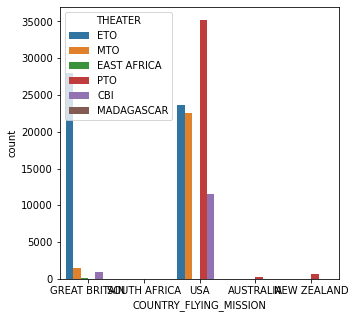

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total)

### Teatro de Operaciones más frecuente, según País Atacante, en 1945

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

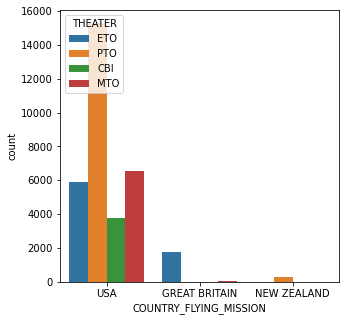

In [29]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total_45)

### Teatro de Operaciones más frecente, según País Atacante, en Total, con ataques superiores a 100 y 800 de Daño Total

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

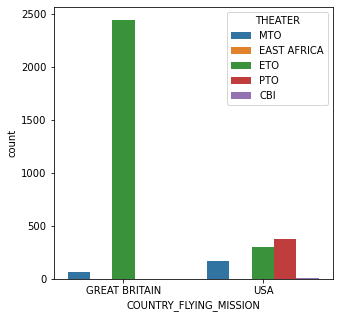

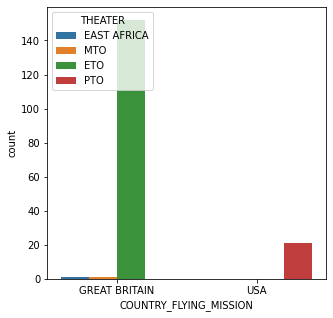

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>100])

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="THEATER", data=df_total[df_total["TOTAL_TONS"]>800])

In [31]:
s=df_total[df_total["THEATER"]=="CBI"]
s["TGT_COUNTRY"].value_counts()

BURMA                         8256
CHINA                         4052
INDIA                           47
THAILAND OR SIAM                20
FRENCH INDO CHINA               10
ANDAMAN ISLANDS                  8
CHINA MINING                     7
FORMOSA AND RYUKYU ISLANDS       3
INDIAN OCEAN                     1
Name: TGT_COUNTRY, dtype: int64

## >Modelos de Avión más frecuentes

### Modelos de Avión más frecuentes, en Total

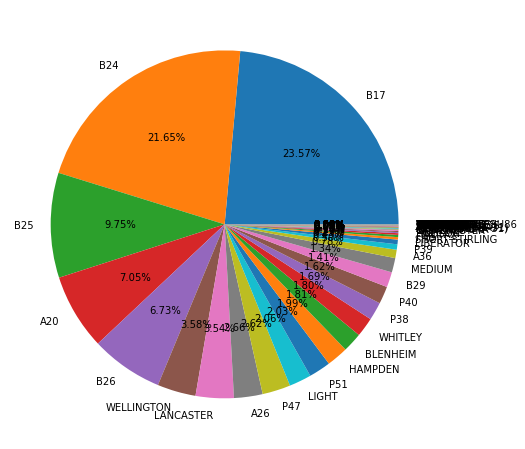

In [32]:
df_total_aviones=df_total["AIRCRAFT_NAME"].value_counts()#<---Definimos variable con el conteo de Modelos de Avión de más frecuentes a menos.

plt.figure(figsize=(8,8))
plt.pie(df_total_aviones.values,
        labels=df_total_aviones.index,
        autopct='%1.2f%%')
plt.show()

### Modelos de Avión más frecuentes, en Total, homogenizando los 63 menos frecuentes

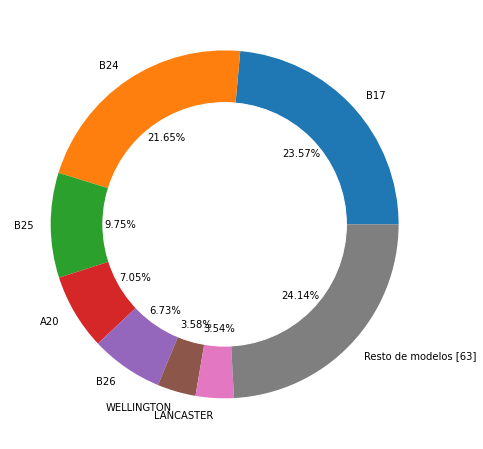

In [33]:
df_total_aviones_less=df_total_aviones[df_total_aviones<6000]#<---Definimos variable con los Modelos de Avión menos frecuentes

c=0
for i in df_total_aviones_less:
    c=i+c

df_total_aviones_less=pd.Series([c],index=["Resto de modelos [63]"])#<---Definimos variable con la Serie de la suma de todas las operaciones por los Modelos de Avión menos frecuentes.
df_total_aviones_max=df_total_aviones[df_total_aviones>=6000]#<---Definimos variable con los Modelos de Avión más frecuentes

df_total_aviones=pd.concat([df_total_aviones_max, df_total_aviones_less])#<---Concatenamos la Serie con los Modelos de Avión menos frecuentes con el DataFrame con los más frecuentes.



my_circle=plt.Circle((0,0), 0.7, color="w")#<--- creamos un circulo blanco

plt.figure(figsize=(8,8))
plt.pie(df_total_aviones.values,
        labels=df_total_aviones.index,
        autopct='%1.2f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)#<--- Insertamos el círculo
plt.show()

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 400

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

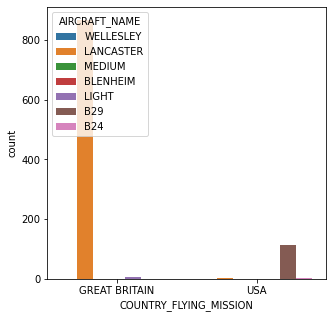

In [34]:
df_total_Tons_600=df_total[df_total["TOTAL_TONS"]>400]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 600

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

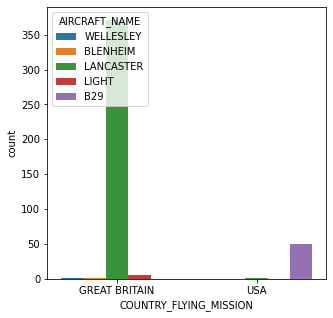

In [35]:
df_total_Tons_600=df_total[df_total["TOTAL_TONS"]>600]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_600)

### Modelos de Avión mas frecuentes, en Total, según País Atacante y Destrucción Total superior a 1000

<AxesSubplot:xlabel='COUNTRY_FLYING_MISSION', ylabel='count'>

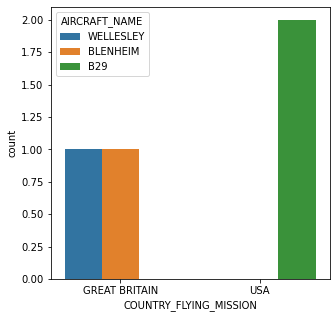

In [36]:
df_total_Tons_1000=df_total[df_total["TOTAL_TONS"]>1000]

plt.figure(figsize=(5,5))
sns.countplot(x="COUNTRY_FLYING_MISSION", hue="AIRCRAFT_NAME", data=df_total_Tons_1000)

#### Modelos de Avión más utilizados por Inglaterra en la Batalla de Inglaterra

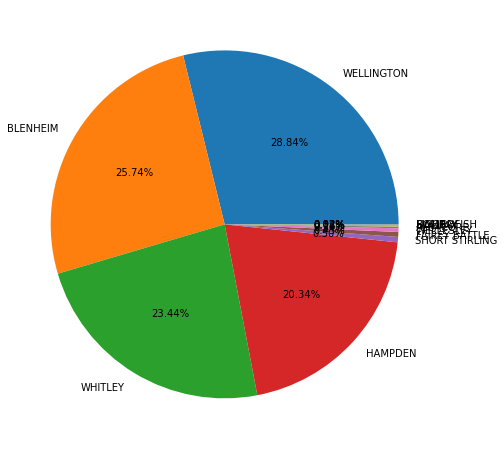

In [83]:
x=df_aviones(df_total_Inglaterra)
x=x["AIRCRAFT_NAME"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(x.values,
        labels=x.index,
        autopct='%1.2f%%')
plt.show()

## >Destrucción Total

### Detonaciones superiores a 990 Tonelada de Drestrucción Total

In [37]:
df_total_Tons_990=df_total[df_total["TOTAL_TONS"]>=990]
print (len(df_total_Tons_990))
df_total_Tons_990

35


,MSNDATE,THEATER,COUNTRY_FLYING_MISSION,NAF,UNIT_ID,AIRCRAFT_NAME,AC_ATTACKING,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,TGT_COUNTRY,TGT_LOCATION,TGT_LATITUDE,TGT_LONGITUDE,TONS_HE,TONS_IC,TONS_FRAG,TOTAL_TONS
178278,1940-08-17,EAST AFRICA,GREAT BRITAIN,RAF,47 SQDN,WELLESLEY,6.0,ERKOWIT,SUDAN,18.75,37.0,SUDAN,KASSALA,15.450000,36.400000,4750.0,0.0,0.0,4750.0
178277,1942-07-22,MTO,GREAT BRITAIN,RAF,NaN,BLENHEIM,NaN,NaN,NaN,NaN,NaN,EGYPT,MERSA MATRUH,31.330000,27.200000,0.0,0.0,0.0,1300.0
178270,1943-06-11,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,DUSSELDORF,51.220000,6.780000,0.0,0.0,0.0,999.0
178260,1943-11-03,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,DUSSELDORF,51.220000,6.780000,0.0,999.0,0.0,999.0
178263,1943-12-20,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,GERMANY,FRANKFURT AM MAIN,50.100000,8.670000,0.0,999.0,0.0,999.0
178247,1944-03-06,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,59.0,NaN,NaN,NaN,NaN,FRANCE,TRAPPES,48.770000,2.000000,995.0,0.0,0.0,995.0
178254,1944-07-04,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,NaN,NaN,NaN,NaN,NaN,FRANCE,ST LEU D ESSERENT,49.220000,2.420000,999.0,0.0,0.0,999.0
178248,1944-09-06,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,51.0,NaN,NaN,NaN,NaN,FRANCE,LE HAVRE,49.500000,6.000000,996.0,0.0,0.0,996.0
178253,1944-09-10,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,75.0,NaN,NaN,NaN,NaN,FRANCE,LE HAVRE,49.500000,6.000000,999.0,0.0,0.0,999.0
178252,1944-09-26,ETO,GREAT BRITAIN,RAF,NaN,LANCASTER,97.0,NaN,NaN,NaN,NaN,FRANCE,CAP GRIS NEZ,50.870000,1.580000,999.0,0.0,0.0,999.0


### Destrucción Total, en Total

In [38]:
df_aviones_2=copy.copy(df_aviones)
df_aviones_2.set_index('AIRCRAFT_NAME',inplace=True)
print(df_aviones)
print(df_aviones_2)

AttributeError: 'function' object has no attribute 'set_index'

In [ ]:
#df_aviones_2[-2350:-2300]
df_aviones_3=copy.copy(df_aviones)
df_aviones_3.set_index('TOTAL_TONS',inplace=True)
print (df_aviones_3.loc[20000.0], df_aviones_3.loc[15000.0])

In [ ]:
print (df_aviones.iloc[-569], "\n", df_aviones.iloc[-322])

In [ ]:
plt.figure(figsize=(20,20))

s=df_aviones[df_aviones["TOTAL_TONS"]<10]
#x=df_total["TOTAL_TONS"].value_counts()
sns.countplot(s["TOTAL_TONS"])

In [ ]:
s=df_total.drop(['TGT_LOCATION', 'THEATER', 'TAKEOFF_BASE', 'TAKEOFF_COUNTRY', 'TAKEOFF_LATITUDE', 'COUNTRY_FLYING_MISSION',
                      'TAKEOFF_LONGITUDE', 'TONS_HE', 'TONS_IC', 'TONS_FRAG', 'AC_ATTACKING', 'NAF', 'UNIT_ID', 'TGT_LATITUDE', 'TGT_LONGITUDE'], axis=1)

plt.figure(figsize=(12,8))
sns.kdeplot(data=s[s.columns.values], shade=True)

### Destrucción Total, en Total, según Países Atacados

In [ ]:
# Obtener la sum() de TONS_TOTAL de cada país

### Media de la Destrucción Total (los 7 mayores), en Total, según los Modelos de Avión

In [ ]:
df_aviones_Tons_mean=df_aviones.groupby(['AIRCRAFT_NAME']).mean()
df_aviones_Tons_mean=(df_aviones_Tons_mean.sort_values('TOTAL_TONS', ascending=False))[:7]
df_aviones_Tons_mean

### Densidad de la Destrucción Total, en los B-17

In [ ]:
s=df_total[df_total["AIRCRAFT_NAME"]=="B17"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])

### Densidad de la Destrucción Total, en los B-29

In [ ]:
s=df_total[df_total["AIRCRAFT_NAME"]=="B29"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])

### Densidad de la Destrucción Total, en los WELLESLEY

In [ ]:
s=df_total[df_total["AIRCRAFT_NAME"]=="WELLESLEY"]
s["TOTAL_TONS"].value_counts()

plt.figure (figsize=(20,10))
sns.kdeplot(s["TOTAL_TONS"])

In [ ]:
df_aviones_B29=df_aviones[df_aviones.AIRCRAFT_NAME.str.contains("B29")]
df_aviones_B29_100=df_aviones_B29[df_aviones_B29["TOTAL_TONS"]>1]
print("Número de Bombardeos:", len(df_aviones_B29_100))
print("Destrucción Total causada:", sum(df_aviones_B29_100["TOTAL_TONS"]))
print("Media de Destrucción Total:", sum(df_aviones_B29_100["TOTAL_TONS"])/len(df_aviones_B29_100))


In [ ]:
"""
z = df_total.loc['AIRCRAFT_NAME'] == 'B17'
z = df_total.loc[z]


plt.figure(figsize=(12,8))
sns.scatterplot(x=z["TOTAL_TONS"],
                y=d,
                s=100,#<---¿?
                hue=df_total["COUNTRY_FLYING_MISSION"])
"""

# OTROS

In [ ]:
#todo ¿WHAT?

%matplotlib inline
plt.figure (figsize=(20,10))

sns.distplot(df_total["MSNDATE"], rug=True)